## Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [28]:
# Import Necessary Library used in Project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Library Version
print("NumPy : {}" .format(np.__version__))
print("Pandas : {}" .format(pd.__version__))
print("Matplotlib : {}" .format(matplotlib.__version__))
print("Seaborn : {}" .format(sns.__version__))

NumPy : 1.15.4
Pandas : 0.23.4
Matplotlib : 3.0.1
Seaborn : 0.9.0


In [46]:
# Read Original Dataset in csv format
train_original=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_original=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [47]:
# Copy Original Dataset into new Variable
train = train_original.copy()
test = test_original.copy()

In [55]:
# Print Columns Name for Training Dataset
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [54]:
# Print Metadata for Training Dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


In [56]:
# Print No. of Rows and Columns in Training Dataset ( Rows, Columns)
print(train.shape)

(614, 13)


In [53]:
# Print First Five Records
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
# Print Column Names for Test Dataset
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [58]:
# Print Metadata for Test Dataset
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [61]:
# Print No. of Rows and Columns for Test Dataset (Rows, Columns)
print(test.shape)

(367, 12)


In [62]:
# Print First Five Records for Test Dataset
print(test.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

# Univariate Analysis

In [65]:
# Univariate Analysis of Target Variable ( Categorial )
# Frequency Table
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [66]:
# Frequency Proportion
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


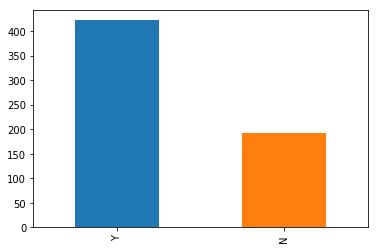

In [73]:
print(train['Loan_Status'].value_counts().plot.bar())

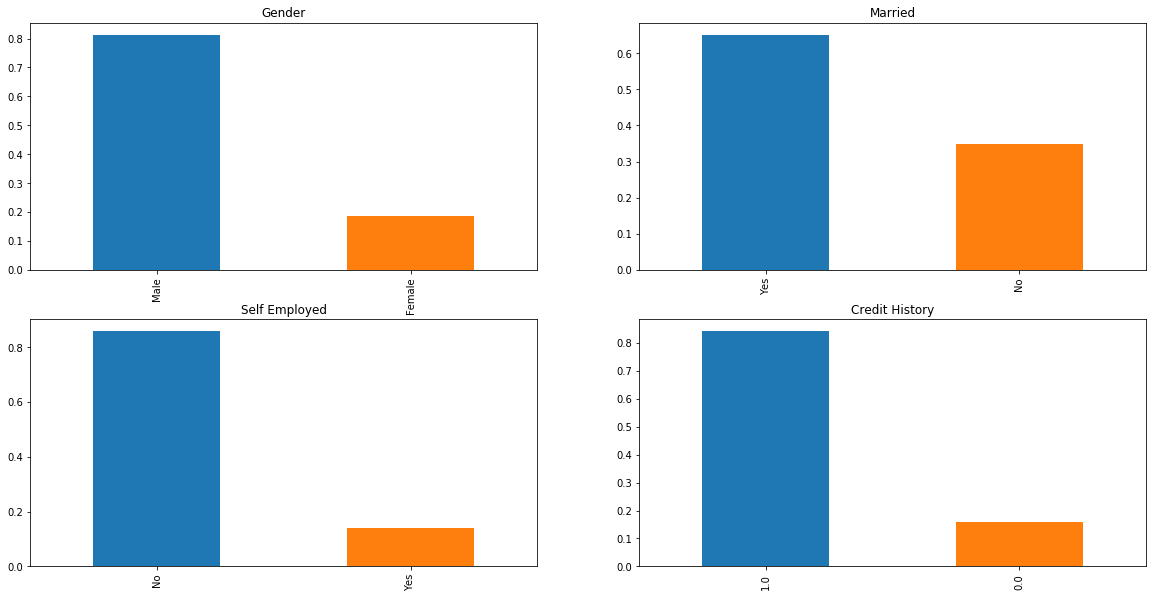

In [68]:
# Univariate Analysis of Independent Categorical variables ( Nominal )
# Gender, Married, Self_Employed, Credit_History
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')


plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit History")

plt.show()

Inference :

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

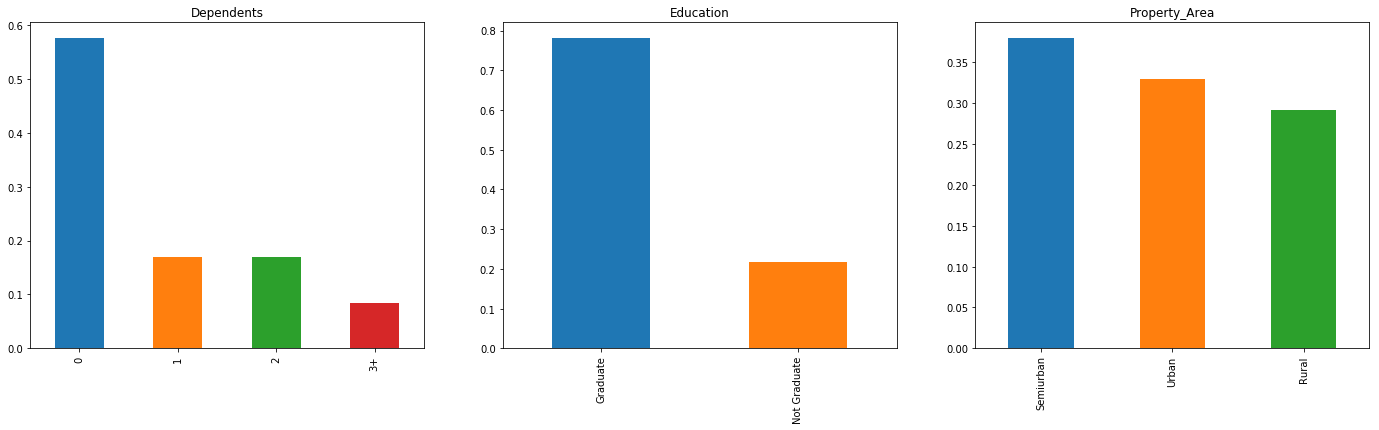

In [69]:
# Univariate Analysis of Independent Ordinal Variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Inference:
- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

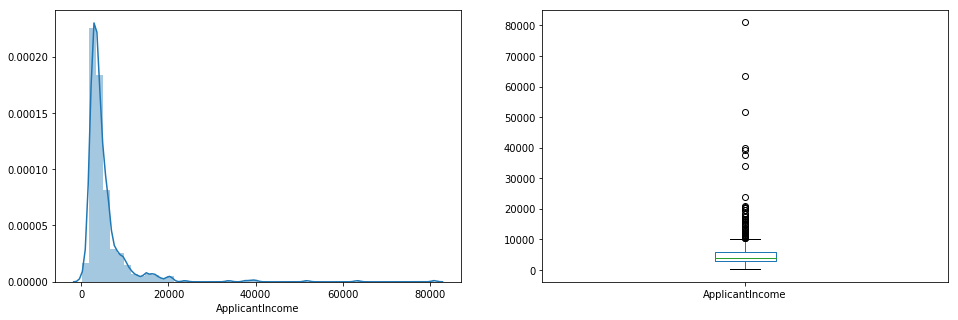

In [70]:
# Univariate Analysis of Independent Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Inference:
    - applicant income is not Normally Distributed.
    - Presence of Outliers from Box Plot.

Text(0.5, 0.98, '')

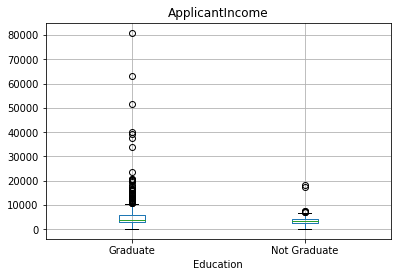

In [71]:
train.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")

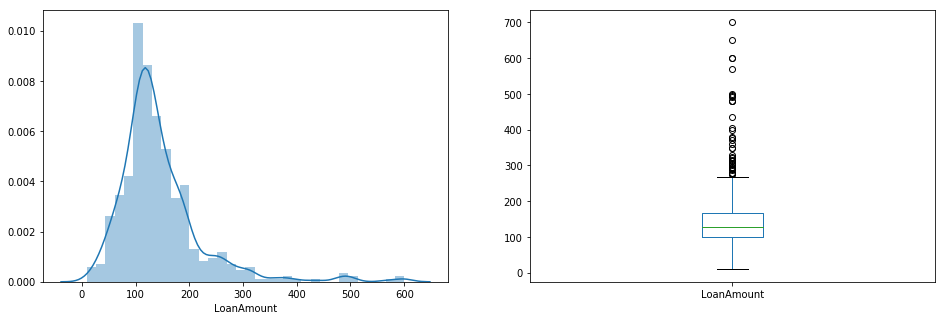

In [72]:
plt.figure(1)

plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# Bivariate Analysis

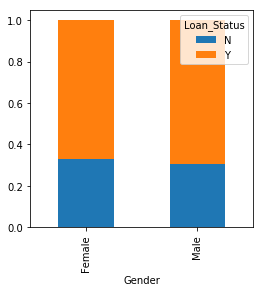

In [17]:
# Gender Vs Loan_Status
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

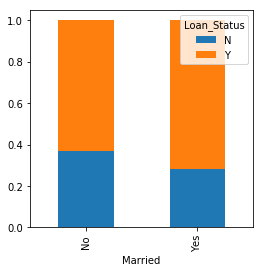

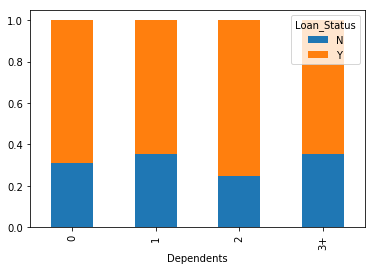

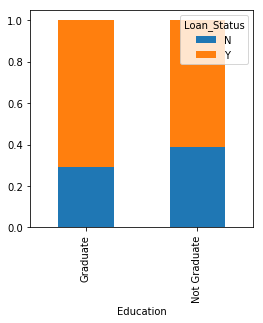

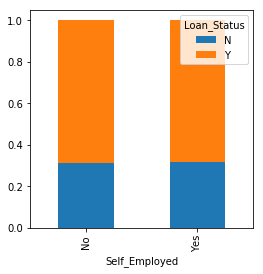

In [18]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Inference :
- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot

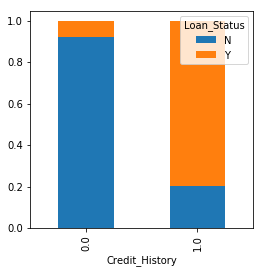

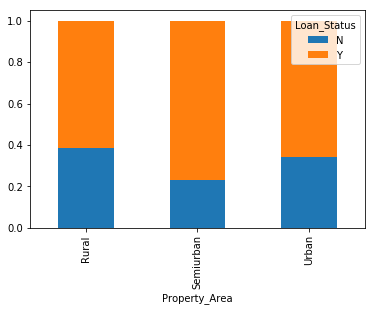

In [19]:
# Bivariate Analysis of Categorical (Ordinal) Variable -> Loan_Status ( Target Variable )
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Inference :
- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

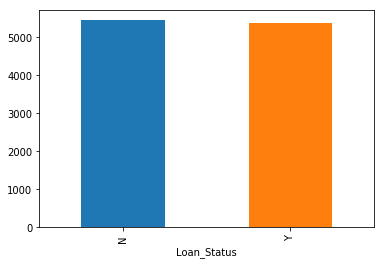

In [20]:
# Bivariate Analysis of Numerical -> Loan Status
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [21]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

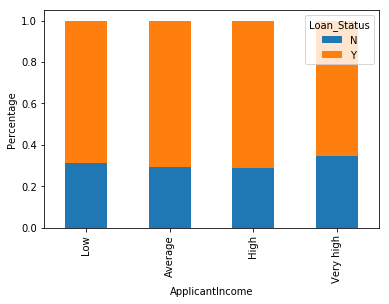

In [22]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Inference :
- Applicant income does not affect the chances of loan approval

In [75]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

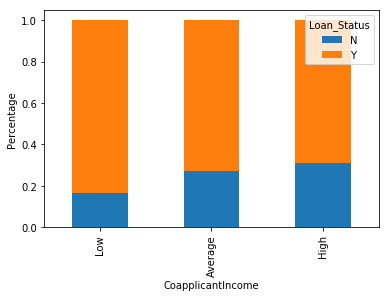

In [78]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [79]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [80]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

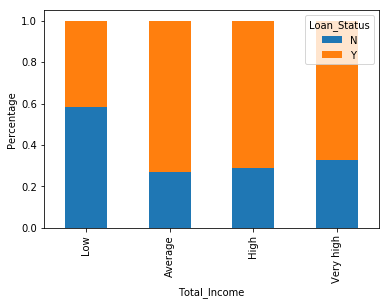

In [81]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [82]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

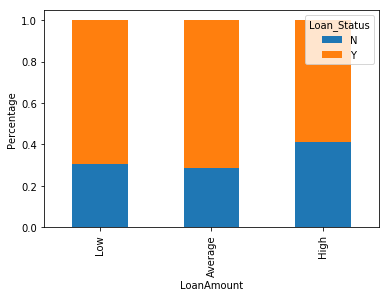

In [83]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Inference :
- proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.

In [85]:
train=train.drop(['Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [86]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

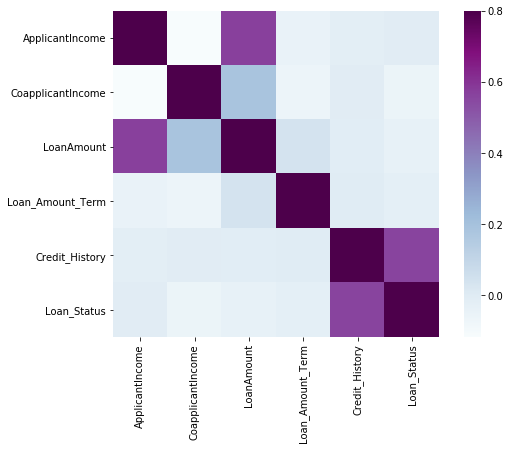

In [87]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing Value Treatment

In [88]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
train['Gender'].fillna( train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [90]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [92]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [93]:
# loan amount have outliers so we will impute using Median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [94]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

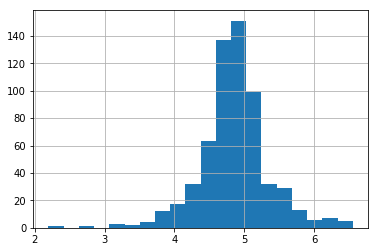

In [95]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [97]:
#train.columns.drop('Income_bin')

# Model Building 
Logistic Regression

In [98]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID',axis=1)

In [99]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [100]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
pred_cv = model.predict(x_cv)

In [106]:
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [107]:
from sklearn.model_selection import StratifiedKFold

In [108]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(X)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


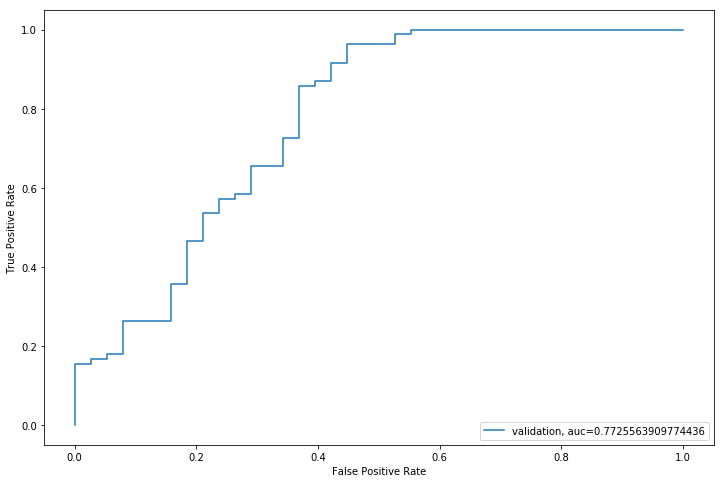

In [111]:
from sklearn import metrics
fpr = dict()
tpr = dict()
fpr, tpr, _= metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Feature Engineering

In [76]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [77]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

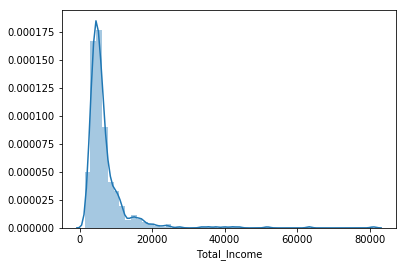

In [78]:
sns.distplot(train['Total_Income']);

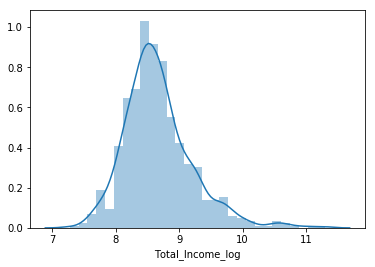

In [79]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [80]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

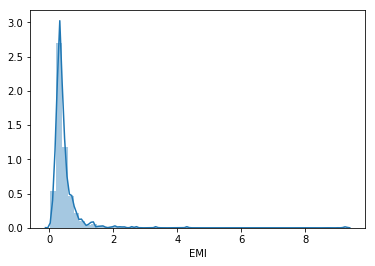

In [81]:
sns.distplot(train['EMI']);

In [82]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

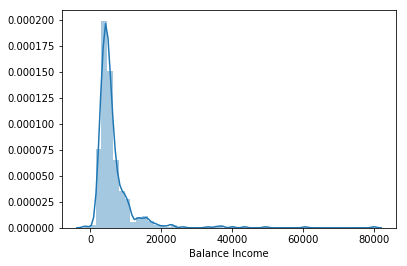

In [83]:
sns.distplot(train['Balance Income']);

In [113]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [114]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

# Logistic Regression

In [115]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


# Decision Tree

In [116]:
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6854838709677419

2 of kfold 5
accuracy_score 0.717741935483871

3 of kfold 5
accuracy_score 0.6721311475409836

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.6229508196721312


# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.782258064516129

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.7622950819672131


In [118]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [119]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [121]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [122]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [123]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


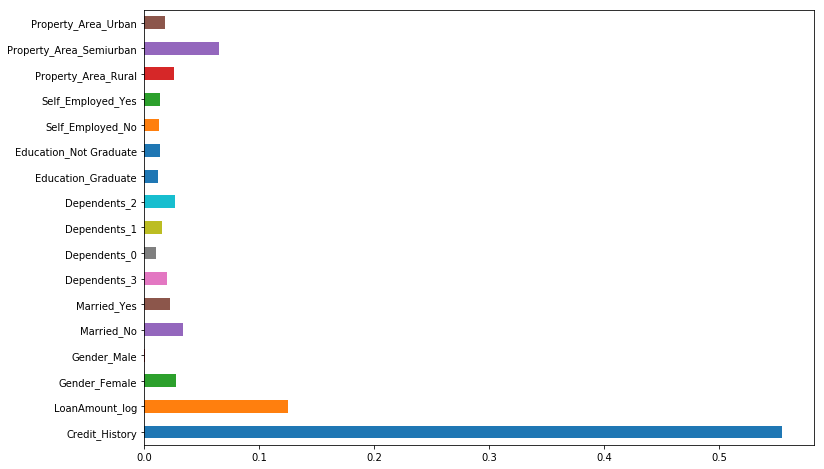

In [124]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# XGBoost

In [125]:
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8467741935483871

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541
